In [1]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('../Scraping/Data/ArticleReactions.db')
df = pd.read_sql_query("SELECT * FROM ArticlesWithReactions", cnx)

In [2]:
df

,id,topic,title,commentcount,likecount,collectioncont
0,239718416,mood,放不下確診離世的家人,402,8535,1207
1,239716067,mood,穿這樣被罵很騷,398,2306,296
2,239714602,mood,我家人說我在賣肉,405,1911,706
3,239713212,mood,跟差點被騙去柬埔寨的朋友絕交了,112,678,181
4,239719301,mood,可以不要抹黑Bump了嗎,56,555,60
...,...,...,...,...,...,...
14788,240048791,talk,神人，跪求神龍大大求此妹子的ig,18,11,28
14789,240048745,talk,同事生病住院都住單人房,1,0,0
14790,240048679,talk,921防災警報,1,10,0
14791,240048677,talk,郵局整存整付利率，升息,2,0,0


In [3]:
length = df.shape[0]
quaterLength = length//4
print(df['title'][50])

讓人窒息的家庭


In [4]:
sumComment, sumLike, sumCollection = 0, 0, 0
for x in range (length):
    sumComment+=int(df['commentcount'][x])
    sumLike+=int(df['likecount'][x]) 
    sumCollection+=int(df['collectioncont'][x]) 
avgComment, avgLike, avgCollection = sumComment/length, sumLike/length, sumCollection/length
avgComment, avgLike, avgCollection

(14.564253363077132, 44.76279321300615, 16.302169945244373)

In [5]:
topComment = df.sort_values('commentcount',ascending=False)[:quaterLength]
lowComment = df.sort_values('commentcount',ascending=False)[-quaterLength:]

In [6]:
topLike = df.sort_values('likecount',ascending=False)[:quaterLength]
lowLike = df.sort_values('likecount',ascending=False)[-quaterLength:]

In [7]:
topCollect = df.sort_values('collectioncont',ascending=False)[:quaterLength]
lowCollect = df.sort_values('collectioncont',ascending=False)[-quaterLength:]

In [8]:
import jieba.analyse
def jiebaSlice(content):
    stopword_set = []

    with open('./stopword.txt','r', encoding='utf-8') as stopwords:
        for stopword in stopwords:
            stopword_set.append(stopword.strip('\n'))

    content = content.strip('\n')
    
#     words = jieba.posseg.cut(content,HMM=True)
#     words = jieba.analyse.extract_tags(content,topK=3,withWeight=True)
    words = jieba.analyse.textrank(content,topK=3,withWeight=True)

    slicedWords = []
    for word, flag in words:
        if word not in stopword_set and word != ' ' and word != '」' and word != '「':
            slicedWords.append(word)

    return slicedWords

In [9]:
topCommentList = topComment['title'].tolist()
lowCommentList = lowComment['title'].tolist()
topLikeList = topLike['title'].tolist()
lowLikeList = lowLike['title'].tolist()
topCollectTileList = topCollect['title'].tolist()
lowCollectTitleList = lowCollect['title'].tolist()

print(topCommentList[-10:],topLikeList[-10:],topCollectTileList[-10:])

def countSlicedWordTimes(titleList):
    jieba_result_article = []
    for x in range(quaterLength):
        jieba_result_article+=jiebaSlice(titleList[x])
    countWord = []
    for x in set(jieba_result_article):
        countWord.append([jieba_result_article.count(x), x])
    countWord = sorted(countWord)
    countWord = countWord[::-1]
    return countWord

topCommentCountWord = countSlicedWordTimes(topCommentList)
lowCommentCountWord = countSlicedWordTimes(lowCommentList)

topLikeCountWord = countSlicedWordTimes(topLikeList)
lowLikeCountWord = countSlicedWordTimes(lowLikeList)

topCollectCountWord = countSlicedWordTimes(topCollectTileList)
lowCollectCountWord = countSlicedWordTimes(lowCollectTitleList)

Building prefix dict from the default dictionary ...


['哭了', '薪水小偷', '我被我的保險業務罵?', '被喜歡的人拒絕了', '我收到的錢不是我的錢', '為什麼胖的男生要穿無袖', '文組畢業對於未來看不到希望', '不敢自己一個人', '問）住家裡帳單誰負責繳？', '謝謝您麥克雞塊超人～！( ˘ ³˘)'] ['會因為禮貌網聊一個月嗎？', '帝國王冠的謝幕：英國女王伊麗莎白二世逝世（1926－2022）', '帝國王冠的謝幕：英國女王伊麗莎白二世逝世（1926－2022）', '昨天我生日，收到11張🍆照', '關於英國女王病逝', '#IG 標記人不需要打字的方法', '我跟閨蜜的前夫在一起了', '星巴克買一送一可以先請店員先做一杯喝完再讓他做另一杯嗎', '女朋友初體驗嘗試被進入', '我媽到底把包養當成什麼了啊？'] ['男友跟我借20萬', '我好愛我女友', '斷聯四個月又回頭找我的網友，他的心態是什麼？', '反綠的各位會喜歡王世堅嗎', '想問大家比較喜歡遠距還是實體', '跟朋友身高差', '這樣是喜歡嗎...？', '有感情問題的你們 請進', '交友軟體遇到噁男的神奇經歷', '男人們該檢討一下了']


Dumping model to file cache /var/folders/hk/mq7wdy2953z7gw87361tc3hw0000gn/T/jieba.cache
Loading model cost 1.078 seconds.
Prefix dict has been built successfully.


In [10]:
print(topCommentCountWord)
filterTimes=30

[[201, '男友'], [72, '男生'], [72, '女生'], [70, '女友'], [65, '喜歡'], [64, '朋友'], [49, '分手'], [48, '覺得'], [36, '台灣'], [35, '軟體'], [34, '知道'], [34, '交友'], [30, '大學'], [27, '發現'], [26, '確診'], [25, '不想'], [24, '交往'], [21, '遇到'], [21, '男朋友'], [21, '家人'], [21, '不到'], [20, '父母'], [20, '包養'], [20, '前任'], [19, '感覺'], [19, '好像'], [18, '感情'], [18, '對象'], [18, '女朋友'], [18, '地震'], [18, '前女友'], [17, '接受'], [17, '室友'], [16, '看到'], [16, '異性'], [16, '情侶'], [16, '媽媽'], [15, '結婚'], [15, '生活'], [15, '小孩'], [15, '分享'], [15, '人生'], [14, '需要'], [13, '適合'], [13, '認識'], [13, '正妹'], [13, '柬埔寨'], [13, '東西'], [13, '希望'], [13, '前男友'], [12, '網友'], [12, '手機'], [12, '可愛'], [11, '討厭'], [11, '訊息'], [11, '要求'], [11, '自殺'], [11, '男人'], [11, '機會'], [11, '小心'], [11, '壓力'], [11, '問題'], [10, '警察'], [10, '英國'], [10, '習慣'], [10, '文長'], [10, '戀愛'], [10, '懷孕'], [10, '應該'], [10, '心情'], [10, '奇怪'], [10, '哥哥'], [10, '台北'], [10, '出軌'], [9, '願意'], [9, '遊戲'], [9, '請進'], [9, '詐騙'], [9, '臉書'], [9, '生小孩'], [9, '火車'], [9, '條件'], [9, '找到'], [9, '

/usr/local/anaconda3/envs/Awesome/lib/python3.7/site-packages/matplotlib/__init__.py


<BarContainer object of 7 artists>

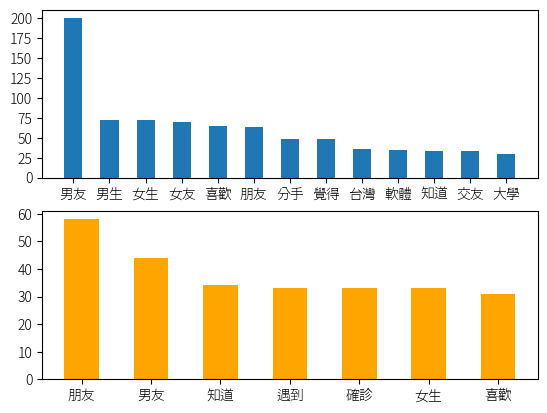

In [11]:
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__file__)
filteredTopCommentCountX, filteredTopCommentCountY= [],[]
filteredLowCommentCountX, filteredLowCommentCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopCommentCountX.append(x[0])
        filteredTopCommentCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowCommentCountX.append(x[0])
        filteredLowCommentCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopCommentCountY,filteredTopCommentCountX, width=0.5)
ax[1].bar(filteredLowCommentCountY,filteredLowCommentCountX, width=0.5, color = 'orange')

<BarContainer object of 7 artists>

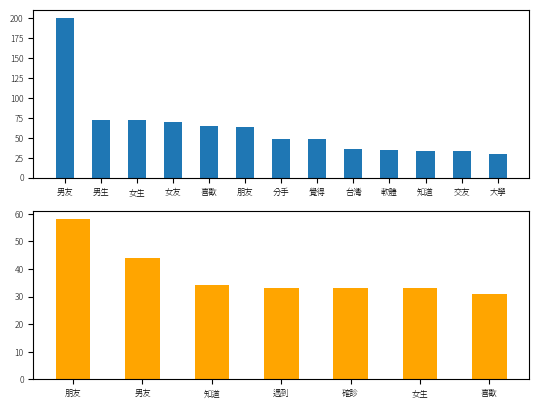

In [12]:
import matplotlib.pyplot as plt
filteredTopLikeCountX, filteredTopLikeCountY= [],[]
filteredLowLikeCountX, filteredLowLikeCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopLikeCountX.append(x[0])
        filteredTopLikeCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowLikeCountX.append(x[0])
        filteredLowLikeCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopLikeCountY,filteredTopLikeCountX, width=0.5)
ax[1].bar(filteredLowLikeCountY,filteredLowLikeCountX, width=0.5, color = 'orange')

<BarContainer object of 7 artists>

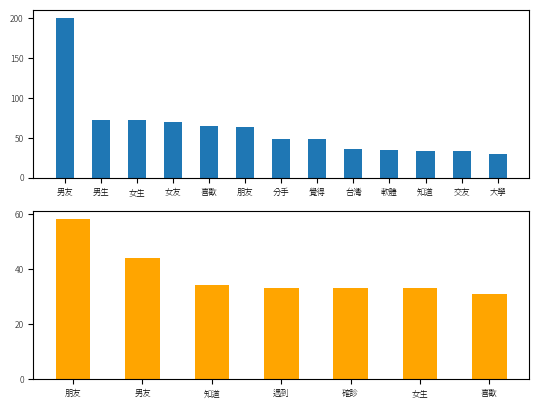

In [13]:
import matplotlib.pyplot as plt
filteredTopCollectCountX, filteredTopCollectCountY= [],[]
filteredLowCollectCountX, filteredLowCollectCountY= [],[]

for x in topCommentCountWord:
    if x[0]>=filterTimes:
        filteredTopCollectCountX.append(x[0])
        filteredTopCollectCountY.append(x[1])

for x in lowCommentCountWord:
    if x[0]>=filterTimes:
        filteredLowCollectCountX.append(x[0])
        filteredLowCollectCountY.append(x[1])  
        
fig, ax = plt.subplots(2)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 9}

matplotlib.rc('font', **font)

ax[0].bar(filteredTopCollectCountY,filteredTopCollectCountX, width=0.5)
ax[1].bar(filteredLowCollectCountY,filteredLowCollectCountX, width=0.5, color = 'orange')

<BarContainer object of 13 artists>

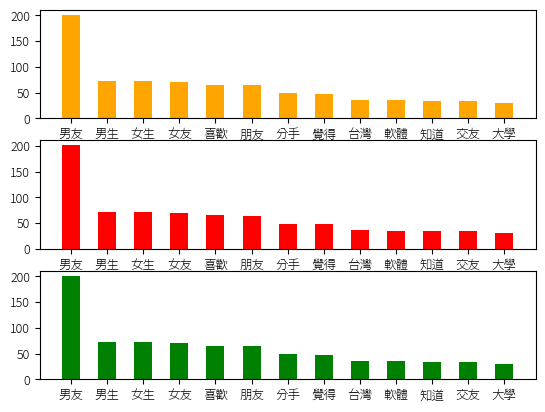

In [14]:
fig, ax = plt.subplots(3)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}
matplotlib.rc('font', **font)
ax[0].bar(filteredTopCommentCountY,filteredTopCommentCountX, width=0.5, color = 'orange')
ax[1].bar(filteredTopLikeCountY,filteredTopLikeCountX, width=0.5, color = 'red')
ax[2].bar(filteredTopCollectCountY,filteredTopCollectCountX, width=0.5, color = 'green')

<BarContainer object of 7 artists>

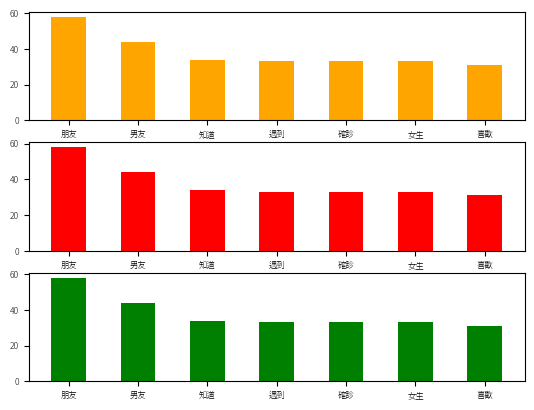

In [15]:
fig, ax = plt.subplots(3)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
font = {'size': 6}
matplotlib.rc('font', **font)
ax[0].bar(filteredLowCommentCountY,filteredLowCommentCountX, width=0.5, color = 'orange')
ax[1].bar(filteredLowLikeCountY,filteredLowLikeCountX, width=0.5, color = 'red')
ax[2].bar(filteredLowCollectCountY,filteredLowCollectCountX, width=0.5, color = 'green')

In [16]:
import matplotlib
print(matplotlib.__file__)

/usr/local/anaconda3/envs/Awesome/lib/python3.7/site-packages/matplotlib/__init__.py


In [17]:
allTopic = df['title']
allTopicList = allTopic.tolist()
allTopicWordCount = countSlicedWordTimes(allTopicList)
print(allTopicWordCount)

[[143, '男友'], [72, '女生'], [69, '朋友'], [55, '女友'], [53, '喜歡'], [51, '台灣'], [47, '男生'], [38, '覺得'], [36, '軟體'], [34, '遇到'], [33, '知道'], [31, '詐騙'], [31, '分手'], [28, '柬埔寨'], [27, '家人'], [26, '發現'], [26, '好像'], [26, '交友'], [25, '感情'], [22, '感覺'], [22, '情侶'], [20, '不想'], [18, '小孩'], [18, '包養'], [17, '警案'], [17, '認識'], [17, '希望'], [17, '媽媽'], [16, '警察'], [16, '討厭'], [16, '男人'], [16, '文長'], [16, '廢死'], [16, '大學'], [15, '確診'], [15, '看到'], [15, '異性'], [15, '正妹'], [15, '愛情'], [14, '接受'], [14, '問題'], [13, '工作'], [13, '單身'], [13, '台南'], [13, '前任'], [13, '分享'], [13, '不到'], [12, '條件'], [12, '戀愛'], [12, '應該'], [12, '想要'], [12, '對象'], [12, '奇怪'], [12, '壓力'], [12, '交往'], [11, '需要'], [11, '請益'], [11, '自殺'], [11, '爸媽'], [11, '支持'], [11, '心得'], [11, '女朋友'], [11, '女孩'], [10, '選擇'], [10, '相信'], [10, '死刑'], [10, '歐陽'], [10, '慎入'], [10, '影片'], [10, '家庭'], [10, '在意'], [10, '事情'], [10, '不用'], [10, '下船'], [9, '訊息'], [9, '臉書'], [9, '老婆'], [9, '結婚'], [9, '社會'], [9, '畢業'], [9, '男朋友'], [9, '東西'], [9, '方式'], [9, '推薦'

In [18]:
print(len(allTopic))

14793
